In [1]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
from astropy import constants as const
import functions as fn
import box
import halo

In [2]:
plt.style.use(str(fn.HERE_PATH/'plot.mplstyle'))

In [3]:
boxes = np.array([])

In [4]:
zoom_path = fn.ZOOMS_PATH/'c112_MDRInt'

In [5]:
for shot in range(int(fn.ZHOT[3]), int(fn.ZHOT[2])+1):
    boxes = np.append(boxes, box.Box(zoom_path, str(shot).zfill(3)))
    
    snap_path = zoom_path/f'snap_{str(shot).zfill(3)}.hdf5'
    
    with h5py.File(snap_path) as snap:
        boxes[-1].mass_bh = np.array(snap.get('PartType5/BH_Mass'))

In [6]:
H0 = boxes[0].h * 100
unit_conv = (1e3 / (const.pc * 1e6)).value
H0 *= unit_conv
Gyr = 60*60*24*365*1e9

In [7]:
z = np.array([box_i.z for box_i in boxes])

In [8]:
def energy(M_thresh, P):
    n = np.array([len(np.where((box_i.mass_bh >= M_thresh))[0]) for box_i in boxes])
    e_cum = np.array([-1/H0*np.trapz((1+z[:i+1])**(-1)*(boxes[i].omega_m*(1+z[:i+1])**3+(1-boxes[i].omega_m))**(-1/2) * n[:i+1] * P, z[:i+1]) for i in range(z.shape[0])])
    return e_cum

In [9]:
M_thresh = np.array([2, 2, 2, 2, 7]) * 1e-4 / boxes[0].h
P = np.array([1, 0.2, 5, 10, 1]) * 8e43

ModM2E-4
1.1242850935838281e+61
ModM2E-4P0.2
2.248570187167656e+60
ModM2E-4P5
5.621425467919141e+61
ModM2E-4P10
1.1242850935838282e+62
ModM7E-4
6.380231220248332e+60


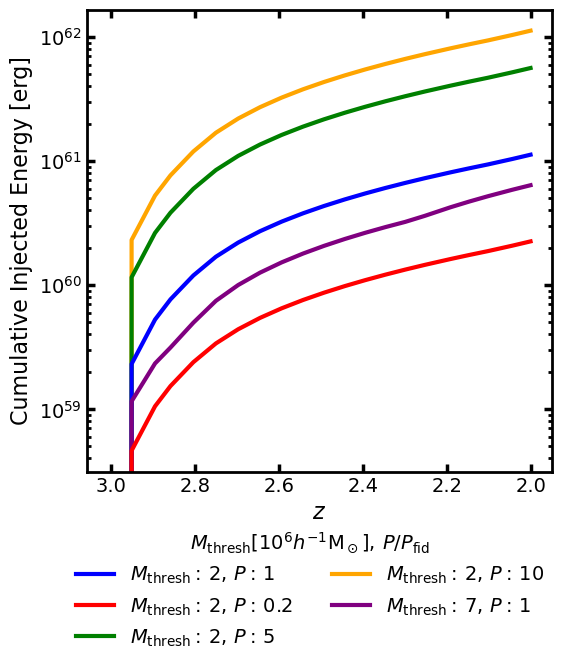

In [20]:
fg, ax = plt.subplots()

for j in range(M_thresh.shape[0]):
    print(fn.MODELS[j+1])
    e_cum = energy(M_thresh[j], P[j])
    print(e_cum[-1])
    ax.plot(z, e_cum, lw=3, c=fn.COLORS[fn.MODELS[j+1]], label=fn.LABELS[fn.MODELS[j+1]], zorder=1/P[j])
ax.invert_xaxis()
ax.semilogy()
ax.set_xlabel(r'$z$')
ax.set_ylabel('Cumulative Injected Energy [erg]')
ax.legend(bbox_to_anchor=(0.48, -0.42), loc='lower center', title=fn.LEGEND_TITLE, ncol=2, )
fg.savefig(fn.HERE_PATH/'Integrated_Energy.pdf', bbox_inches='tight')
fg.savefig(fn.HERE_PATH/'Project_Plots'/'Integrated_Energy.pdf', bbox_inches='tight')

In [11]:
print(z.shape)

(21,)


In [12]:
print(e_cum.shape)

(21,)


In [13]:
e_cum

array([-0.00000000e+00,  1.15383142e+59,  2.33164984e+59,  3.13035389e+59,
        4.96916928e+59,  7.45727926e+59,  9.99680670e+59,  1.25887203e+60,
        1.52340012e+60,  1.79336425e+60,  2.06886493e+60,  2.35000381e+60,
        2.63688368e+60,  2.92960841e+60,  3.22828292e+60,  3.61050068e+60,
        4.23443321e+60,  4.71334935e+60,  5.20188862e+60,  5.86859639e+60,
        6.38023122e+60])

In [14]:
!conda list 'matplotlib'

# packages in environment at /data/ERCblackholes4/eac83/envirs/envs/ewanv:
#
# Name                    Version                   Build  Channel
matplotlib                3.7.1           py311h06a4308_1  
matplotlib-base           3.7.1           py311ha02d727_1  
matplotlib-inline         0.1.6           py311h06a4308_0  
